<a href="https://colab.research.google.com/github/ceticmaja/PPPO/blob/main/PPPO_Maja_Cetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ovde. dodajes opise za klasifikaciju i generalno sta ti je set podataka 

<h1>Klasifikacija</h1>

Klasifikacija je vrsta nadgledanog učenja čiji je cilj predvideti kategoričke klasne oznake novih instanci na osnovu ranijih opažanja, odnosno ulaza. Klasifikacija se odnosi na dodelu pojava, odnosno entiteta u određenu kategoriju na osnovu vrednosti ostalih atributa. Klase su date kao nominalne vrednosti, npr.:
  *   klasifikacija živih bića: monere, protisti, gljive, biljke, životinje
  *   klasifikacija oblaka: cirus, curostratus, cirokumulus, altokumulus, nimbus, itd.

U zavisnosti od broja klasa, razlikuje se binarna klasifikacija i višeklasna, gde postoji više klasa u koje instance treba razvrstati. Princip rada algoritma je u oba slučaja, gotovo isti. U slučaju postojanja više klasa, algoritam iterativno uči, tako da u svakoj iteraciji nauči da jednu od klasa razgraniči od svih ostalih. 

<h2> Set podataka </h2>

U ovom projektu, korišćen je set podataka koji sadrži fotografije lego figura različitih fiktivnih likova, a cilj klasifikacije je odrediti kojoj klasi pripadaju, odnosno koji je lik sa slike. Korišćeni algoritmi klasifikacije su istrenirane neuronske mreže DenseNet121 i ResNet50. Ova dva algoritma dala su različiti stepen uspešnosti za isti opseg podataka i broj iteracija izvršavanja, a u nastavku dat je pregled postupka klasifikovanja podataka pomoću pomenutih algoritama.



Prvi korak predstavlja učitavanje samog seta podataka. 

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Kh-5tmaMOTFFx9kCrloM2VbqaBmEE7uW' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Kh-5tmaMOTFFx9kCrloM2VbqaBmEE7uW" -O data.zip && rm -rf /tmp/cookies.txt

--2022-09-22 17:43:49--  https://docs.google.com/uc?export=download&confirm=&id=1Kh-5tmaMOTFFx9kCrloM2VbqaBmEE7uW
Resolving docs.google.com (docs.google.com)... 172.217.1.206, 2607:f8b0:4004:801::200e
Connecting to docs.google.com (docs.google.com)|172.217.1.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k4r83sps8o6ov2lnd5v2a1h9njfkfnut/1663868625000/06049624160957438625/*/1Kh-5tmaMOTFFx9kCrloM2VbqaBmEE7uW?e=download&uuid=8c423d01-86f5-4740-858b-c7fdd22dfe31 [following]
--2022-09-22 17:43:54--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k4r83sps8o6ov2lnd5v2a1h9njfkfnut/1663868625000/06049624160957438625/*/1Kh-5tmaMOTFFx9kCrloM2VbqaBmEE7uW?e=download&uuid=8c423d01-86f5-4740-858b-c7fdd22dfe31
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 172.253.63.132, 2607:f8b0:4004

Zatim, potrebno je "otpakovati" set podataka kako bismo pristupili svim potrebnim fajlovima iz paketa i manipulisali podacima.

In [ ]:
!unzip data.zip

Archive:  data.zip
  inflating: LICENSE                 
  inflating: harry-potter/0001/001.jpg  
  inflating: harry-potter/0001/002.jpg  
  inflating: harry-potter/0001/003.jpg  
  inflating: harry-potter/0001/004.jpg  
  inflating: harry-potter/0001/005.jpg  
  inflating: harry-potter/0001/006.jpg  
  inflating: harry-potter/0001/007.jpg  
  inflating: harry-potter/0001/008.jpg  
  inflating: harry-potter/0001/009.jpg  
  inflating: harry-potter/0001/010.jpg  
  inflating: harry-potter/0001/011.jpg  
  inflating: harry-potter/0001/012.jpg  
  inflating: harry-potter/0001/013.jpg  
  inflating: harry-potter/0002/001.jpg  
  inflating: harry-potter/0002/002.jpg  
  inflating: harry-potter/0002/003.jpg  
  inflating: harry-potter/0002/004.jpg  
  inflating: harry-potter/0002/005.jpg  
  inflating: harry-potter/0002/006.jpg  
  inflating: harry-potter/0002/007.jpg  
  inflating: harry-potter/0002/008.jpg  
  inflating: harry-potter/0002/009.jpg  
  inflating: harry-potter/0002/010.jpg  


Za potrebu ovog projekta, sve operacije i grafičke prikaze, potrebno je uvesti nekoliko Python biblioteka. To su:
*   numpy - omogućava rad sa nizovima,
*   pandas - koristi se za analizu podataka,
*   seaborn - upotreba vizualizacija,
*   cv2 - import Python modula.

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import cv2

TensorFlow je besplatna biblioteka otvorenog koda za mašinsko učenje i veštačku inteligenciju. Može se koristiti u nizu zadataka, ali ima poseban fokus na obuci i zaključivanju dubokih neuronskih mreža. 

Zbog klasifikacionih algoritama neuronskih mreža DenseNet121 i ResNet50, potrebno je dodatno uvesti ovu biblioteku sa pripadajućim modulima.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2 as tf_mobilenet_v2
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten,Dropout, Dense
from tensorflow.keras.optimizers import Adam

Potrebno je importovati i nekoliko biblioteka specificiranih za mašinsko učenje i neuronske mreže, kao i date grafičke alate reprezentacije da bi se rezultati operacija prikazali na analitički način.

In [ ]:
from keras.preprocessing.image import  load_img,img_to_array

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Zatim, učitava se i koristi grafički prikaz fotografija iz seta podataka.

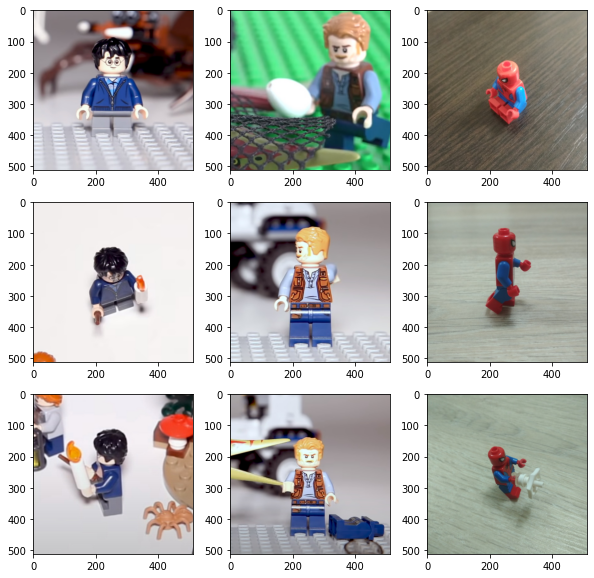

In [ ]:
images = [[],[],[]]
index = ['002', '005', '007']

for i in range(3):
    images[i].append(mpimg.imread('harry-potter/0001/' + index[i] + '.jpg'))
    images[i].append(mpimg.imread('jurassic-world/0001/' + index[i] + '.jpg'))
    images[i].append(mpimg.imread('marvel/0001/' + index[i] + '.jpg'))

fig, axs = plt.subplots(3,3, figsize=(10,10))

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(images[i][j])

U nastavku sledi učitavanje CSV fajla iz seta podataka. Fajl *index_df* sadrži fotografije koje želimo da prikažemo, a *metadata_df* predstavlja metapodatke u setu podataka, ondosno nazive figurica - klase u koje želimo da razvrstamo fotografije iz seta podataka.

In [ ]:
 index_df = pd.read_csv('index.csv')
index_df

path  class_id
0       marvel/0001/001.jpg         1
1       marvel/0001/002.jpg         1
2       marvel/0001/003.jpg         1
3       marvel/0001/004.jpg         1
4       marvel/0001/005.jpg         1
..                      ...       ...
337  star-wars/0014/005.jpg        35
338  star-wars/0014/006.jpg        35
339  star-wars/0014/007.jpg        35
340  star-wars/0014/008.jpg        35
341  star-wars/0014/009.jpg        35

[342 rows x 2 columns]

In [ ]:
metadata_df = pd.read_csv('metadata.csv')
metadata_df

class_id lego_ids                             lego_names  \
0          1  [76115]              ['Spider Mech vs. Venom']   
1          2  [76115]              ['Spider Mech vs. Venom']   
2          3  [76115]              ['Spider Mech vs. Venom']   
3          4  [76115]              ['Spider Mech vs. Venom']   
4          5  [75208]                         ["Yoda's Hut"]   
5          6  [75208]                         ["Yoda's Hut"]   
6          7  [75208]                         ["Yoda's Hut"]   
7          8  [75199]   ["General Grievous' Combat Speeder"]   
8          9  [75199]   ["General Grievous' Combat Speeder"]   
9         10  [75264]    ["Kylo Ren's Shuttle Microfighter"]   
10        11  [75254]  ["AT-ST Raider from The Mandalorian"]   
11        12  [75254]  ["AT-ST Raider from The Mandalorian"]   
12        13  [75254]  ["AT-ST Raider from The Mandalorian"]   
13        14  [75254]  ["AT-ST Raider from The Mandalorian"]   
14        15  [76128]                  ["Molten Man Battle"]   
15        16  [76128]                  ["Molten Man Battle"]   
16        17  [76128]                  ["Molten Man Battle"]   
17        18  [75950]                      ["Aragog's Lair"]   
18        19  [75950]                      ["Aragog's Lair"]   
19        20  [76162]     ["Black Widow's Helicopter Chase"]   
20        21  [76162]     ["Black Widow's Helicopter Chase"]   
21        22  [76162]     ["Black Widow's Helicopter Chase"]   
22        23  [76123]  ["Captain America: Outriders Attack"]   
23        24  [76123]  ["Captain America: Outriders Attack"]   
24        25  [76123]  ["Captain America: Outriders Attack"]   
25        26  [75926]                   ["Pteranodon Chase"]   
26        27  [75926]                   ["Pteranodon Chase"]   
27        28  [76125]             ["Iron Man Hall of Armor"]   
28        29  [76125]             ["Iron Man Hall of Armor"]   
29        30  [76125]             ["Iron Man Hall of Armor"]   
30        31  [76125]             ["Iron Man Hall of Armor"]   
31        32  [75273]       ["Poe Dameron's X-wing Fighter"]   
32        33   [7104]                       ["Desert Skiff"]   
33        34  [75183]         ["Darth Vader Transformation"]   
34        35  [75183]         ["Darth Vader Transformation"]   

                minifigure_name  
0                    SPIDER-MAN  
1                         VENOM  
2                      AUNT MAY  
3                  GHOST SPIDER  
4                          YODA  
5                LUKE SKYWALKER  
6                         R2-D2  
7                    MACE WINDU  
8              GENERAL GRIEVOUS  
9                      KYLO REN  
10              THE MANDALORIAN  
11                    CARA DUNE  
12         KLATOOINIAN RAIDER 1  
13         KLATOOINIAN RAIDER 2  
14                     MYSTERIO  
15                  FIREFIGHTER  
16                   SPIDER-MAN  
17                 HARRY POTTER  
18                  RON WEASLEY  
19                  BLACK WIDOW  
20                YELENA BELOVA  
21                   TASKMASTER  
22              CAPTAIN AMERICA  
23                   OUTRIDER 1  
24                   OUTRIDER 2  
25                   OWEN GRADY  
26  TRACKER TRAQUEUR RASTREADOR  
27                IRON MAN MK 1  
28                IRON MAN MK 5  
29               IRON MAN MK 41  
30               IRON MAN MK 50  
31                       JANNAH  
32                     HAN SOLO  
33                  DARTH VADER  
34             ANAKIN SKYWALKER

*data_df* predstavlja skup podataka (obeležja class_id i minifigure_name) iz prethodno spomenutih fajlova, spojenih po obeležju *class_id*, koje je zajedničko za oba skupa. 

In [ ]:
data_df = pd.merge(index_df, metadata_df[['class_id', 'minifigure_name']], on='class_id')
data_df

path  class_id   minifigure_name
0       marvel/0001/001.jpg         1        SPIDER-MAN
1       marvel/0001/002.jpg         1        SPIDER-MAN
2       marvel/0001/003.jpg         1        SPIDER-MAN
3       marvel/0001/004.jpg         1        SPIDER-MAN
4       marvel/0001/005.jpg         1        SPIDER-MAN
..                      ...       ...               ...
337  star-wars/0014/005.jpg        35  ANAKIN SKYWALKER
338  star-wars/0014/006.jpg        35  ANAKIN SKYWALKER
339  star-wars/0014/007.jpg        35  ANAKIN SKYWALKER
340  star-wars/0014/008.jpg        35  ANAKIN SKYWALKER
341  star-wars/0014/009.jpg        35  ANAKIN SKYWALKER

[342 rows x 3 columns]

Komandom info može da se vidi više informacija o odabranom skupu podaka, kao što su broj kolona, naziv kolona, tip podataka, alokacija memorije, i sl.

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 341
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   path             342 non-null    object
 1   class_id         342 non-null    int64 
 2   minifigure_name  342 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.7+ KB


U nastavku prikazan je uzorak iz skupa podataka u grafičkoj reprezentaciji, od 20 jedinki.

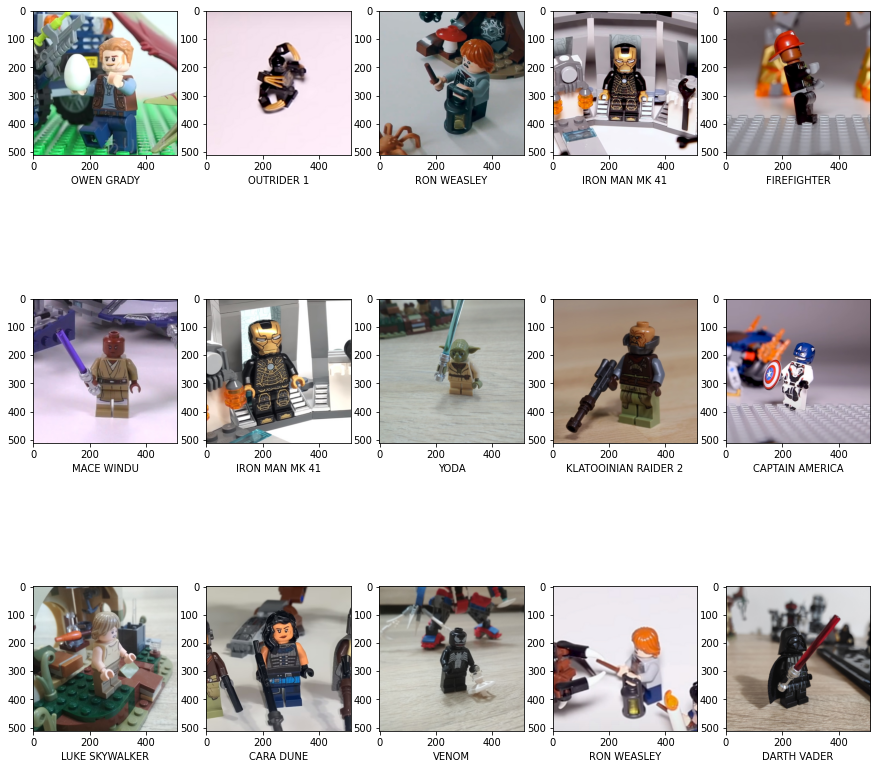

In [ ]:
sample_df=data_df.sample(20)

plt.figure(figsize=(15,15))
i=0
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.grid(False)
    img=load_img(sample_df['path'].values[i])
    plt.imshow(img)
    plt.xlabel(sample_df['minifigure_name'].values[i])
    i += 1
plt.show()

Sledeća grafička reprezentacija izlistava broj fotografija, odnosno prikaza određene figurice po klasama - imenima likova koji se na tim fotografijama nalaze.

In [ ]:
import plotly.graph_objects as go
df_count=data_df['minifigure_name'].value_counts().to_frame().reset_index().rename(columns={'index':'minifigure_name','minifigure_name':'Count'})

fig = go.Figure(go.Bar(
    x=df_count['minifigure_name'],y=df_count['Count'],
    marker={'color': df_count['Count'], 
    'colorscale': 'ylgnbu'},  
    text=df_count['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Number of minifigures',xaxis_title="Minifigure Name",yaxis_title="Number",title_x=0.5)
fig.show()

<h2> PODELA PODATAKA NA TRENING I TEST PODATKE </h2> 

Kada su sve potrebne biblioteke importovane, podaci učitani i na osnovni način grafički prikazani i analizirani, sledeći korak je podela podataka na test i trening podatke. test_df učitava CSV fajl, a iz njega, u x_test kao ulazne testne podatke učitavaju se obeležja osim *class_id*, dok izlazni testni podaci y_test sadrže obeležje *class_id*.

In [ ]:
test_df = pd.read_csv('test.csv')
X_test = test_df.drop(columns = ['class_id'])
X_test

path
0   test/001.jpg
1   test/002.jpg
2   test/003.jpg
3   test/004.jpg
4   test/005.jpg
..           ...
65  test/066.jpg
66  test/067.jpg
67  test/068.jpg
68  test/069.jpg
69  test/070.jpg

[70 rows x 1 columns]

In [ ]:
y_test = test_df['class_id']
y_test

0     32
1     32
2     32
3     32
4      1
      ..
65    34
66    34
67    35
68    35
69    35
Name: class_id, Length: 70, dtype: int64

U nastavku je izvršen merge *test_df* i *metadata_df* po *class_id*, kao i sortiranje po obeležju path.

In [ ]:
test_actual_df = pd.merge(test_df, metadata_df[['class_id', 'minifigure_name']], on='class_id')
test_actual_df = test_actual_df.sort_values('path')
test_actual_df

path  class_id   minifigure_name
0   test/001.jpg        32            JANNAH
1   test/002.jpg        32            JANNAH
2   test/003.jpg        32            JANNAH
3   test/004.jpg        32            JANNAH
4   test/005.jpg         1        SPIDER-MAN
..           ...       ...               ...
65  test/066.jpg        34       DARTH VADER
66  test/067.jpg        34       DARTH VADER
67  test/068.jpg        35  ANAKIN SKYWALKER
68  test/069.jpg        35  ANAKIN SKYWALKER
69  test/070.jpg        35  ANAKIN SKYWALKER

[70 rows x 3 columns]

In [ ]:
X_data = data_df.drop(columns = ['class_id'])
X_data

path   minifigure_name
0       marvel/0001/001.jpg        SPIDER-MAN
1       marvel/0001/002.jpg        SPIDER-MAN
2       marvel/0001/003.jpg        SPIDER-MAN
3       marvel/0001/004.jpg        SPIDER-MAN
4       marvel/0001/005.jpg        SPIDER-MAN
..                      ...               ...
337  star-wars/0014/005.jpg  ANAKIN SKYWALKER
338  star-wars/0014/006.jpg  ANAKIN SKYWALKER
339  star-wars/0014/007.jpg  ANAKIN SKYWALKER
340  star-wars/0014/008.jpg  ANAKIN SKYWALKER
341  star-wars/0014/009.jpg  ANAKIN SKYWALKER

[342 rows x 2 columns]

In [ ]:
y_data = data_df['class_id']
y_data

0       1
1       1
2       1
3       1
4       1
       ..
337    35
338    35
339    35
340    35
341    35
Name: class_id, Length: 342, dtype: int64

Funkcijom len uz prosleđene podatke dobija se rezultat o dužini tj. broju podataka iz posmatranog skupa.

In [ ]:
len(data_df)

342

In [ ]:
len(test_df)

70

Zatim se vrši podela podatke na trening i validacione, prilikom čega trening zauzimaju 80%, a validacioni 20% ukupnih podataka,

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.20, random_state= 8)

U nastavku izvršen je resize slika, gde je veličina slika smanjena na 224 x 224, kao čest primer veličine obrade podataka u fotografijama kroz mašinsko učenje. Takođe, izvršena je normalizacija trening podataka, kako bi podaci bili u opsegu 0-1.

In [ ]:
X_train_converted = np.zeros((X_train.shape[0], 224, 224, 3))

for i in range(X_train.shape[0]):
    image = cv2.imread(X_train["path"].values[i])
    image = cv2.resize(image, dsize=(224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_train_converted[i] = image/255

y_train_converted = np.array(y_train)-1

Tako sređeni podaci kada se izlistaju, daju normalnizovan opseg od 0 do 1.

In [ ]:
X_train_converted[0]

array([[[0.29019608, 0.30588235, 0.29411765],
        [0.29803922, 0.31764706, 0.30196078],
        [0.29803922, 0.31764706, 0.29019608],
        ...,
        [0.56470588, 0.55294118, 0.49019608],
        [0.56470588, 0.54901961, 0.49411765],
        [0.57254902, 0.54901961, 0.49803922]],

       [[0.25098039, 0.27058824, 0.25490196],
        [0.25882353, 0.28235294, 0.26666667],
        [0.25882353, 0.27843137, 0.25098039],
        ...,
        [0.57254902, 0.56078431, 0.49411765],
        [0.56862745, 0.55686275, 0.49803922],
        [0.58039216, 0.55686275, 0.50196078]],

       [[0.20784314, 0.22745098, 0.20392157],
        [0.21960784, 0.23921569, 0.22352941],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.58823529, 0.56470588, 0.50980392],
        [0.58431373, 0.56078431, 0.50980392],
        [0.57647059, 0.56078431, 0.51372549]],

       ...,

       [[0.70588235, 0.69411765, 0.61960784],
        [0.70980392, 0.69803922, 0.62745098],
        [0.70196078, 0

Postupak se ponovlja i za validacione podatke: urađeni su resize i normalizacija validacionih podataka - podaci nalaze u opsegu 0-1.

In [ ]:
X_val_converted = np.zeros((X_val.shape[0], 224, 224, 3))

for i in range(X_val.shape[0]):
    image = cv2.imread(X_val["path"].values[i])
    image = cv2.resize(image, dsize=(224,224)) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_val_converted[i] = image/255

y_val_converted = np.array(y_val)-1

In [ ]:
X_val_converted[0]

array([[[0.37254902, 0.34117647, 0.2745098 ],
        [0.38823529, 0.34901961, 0.28235294],
        [0.38431373, 0.34901961, 0.28235294],
        ...,
        [0.56078431, 0.54901961, 0.48235294],
        [0.56470588, 0.54901961, 0.48235294],
        [0.55686275, 0.54509804, 0.47843137]],

       [[0.39215686, 0.36470588, 0.29411765],
        [0.41176471, 0.38431373, 0.31372549],
        [0.41176471, 0.37647059, 0.30980392],
        ...,
        [0.56470588, 0.55294118, 0.48627451],
        [0.57254902, 0.56078431, 0.49411765],
        [0.56862745, 0.55686275, 0.49019608]],

       [[0.41960784, 0.39215686, 0.32156863],
        [0.41176471, 0.38431373, 0.31372549],
        [0.40392157, 0.37647059, 0.30588235],
        ...,
        [0.56470588, 0.55294118, 0.48627451],
        [0.58039216, 0.56862745, 0.50196078],
        [0.56862745, 0.55686275, 0.49019608]],

       ...,

       [[0.30980392, 0.27058824, 0.23529412],
        [0.3372549 , 0.29803922, 0.2627451 ],
        [0.31372549, 0

In [ ]:
X_test_converted = np.zeros((X_test.shape[0], 224, 224, 3))

for i in range(X_test.shape[0]-1):
    image = cv2.imread(X_test["path"].values[i])
    image = cv2.resize(image, dsize=(224,224)) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_test_converted[i] = image/255

y_test_converted = np.array(y_test)

<h2> DENSENET121</h2>

In [ ]:
from tensorflow.keras.applications import DenseNet121
dense_net = tf.keras.applications.DenseNet121()

dense_net_layer=Dropout(0.5)(dense_net.layers[-2].output)
number_of_classes = len(data_df['class_id'].unique())

last_layer = Dense(number_of_classes, activation="softmax")(dense_net_layer)
model = Model(dense_net.input, last_layer)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])

33202176/33188688 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='model.h5', monitor="val_accuracy", save_best_only=True, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [ ]:
hist=model.fit(
    X_train_converted, 
    y_train_converted, 
    epochs=20, 
    validation_data=(X_val_converted, y_val_converted), 
    shuffle=True, 
    batch_size=10, 
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/20
28/28 [==============================] - ETA: 0s - loss: 4.1843 - accuracy: 0.0403
Epoch 1: val_accuracy improved from -inf to 0.10145, saving model to model.h5
28/28 [==============================] - 33s 366ms/step - loss: 4.1843 - accuracy: 0.0403 - val_loss: 3.4863 - val_accuracy: 0.1014
Epoch 2/20
28/28 [==============================] - ETA: 0s - loss: 2.3548 - accuracy: 0.4066
Epoch 2: val_accuracy improved from 0.10145 to 0.26087, saving model to model.h5
28/28 [==============================] - 5s 182ms/step - loss: 2.3548 - accuracy: 0.4066 - val_loss: 2.6209 - val_accuracy: 0.2609
Epoch 3/20
28/28 [==============================] - ETA: 0s - loss: 1.2690 - accuracy: 0.7143
Epoch 3: val_accuracy improved from 0.26087 to 0.42029, saving model to model.h5
28/28 [==============================] - 5s 178ms/step - loss: 1.2690 - accuracy: 0.7143 - val_loss: 2.0993 - val_accuracy: 0.4203
Epoch 4/20
28/28 [==============================] - ETA: 0s - loss: 0.7807 - accurac

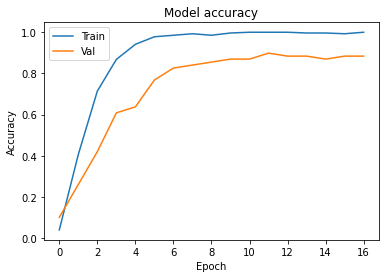

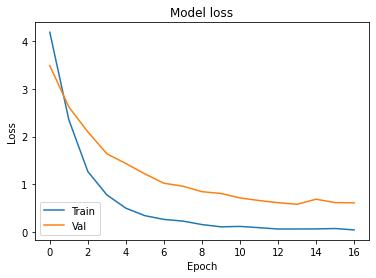

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower left')
plt.show()

Model accurancy - tacnost modela - Tačnost modela se definiše kao broj klasifikacija koje model tačno predviđa podeljen sa ukupnim brojem napravljenih predviđanja. To je način procene performansi modela, ali svakako nije jedini način.

Model loss sa druge strane govori koliko je pogrešnih predikcija bilo.

In [ ]:

from tensorflow.keras import models as tf_models

model = tf_models.load_model('model.h5')

Sledi prikaz algoritma na konkretnim primerima, odnosno nad slikama iz seta podataka. Iznad figurice piše predviđena vrednost, a ispod slike piđe vrednost koju je algoritam predvideo, odnosno klasa kojoj figura pripada.

Class: 32 Minifigure: JANNAH


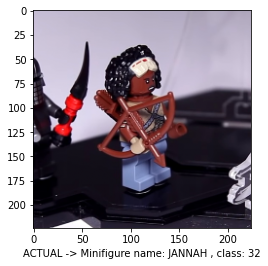

Class: 32 Minifigure: JANNAH


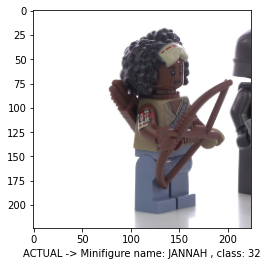

Class: 32 Minifigure: JANNAH


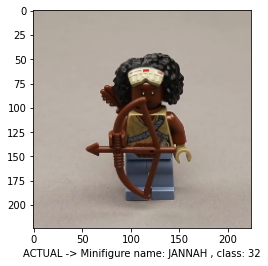

Class: 32 Minifigure: JANNAH


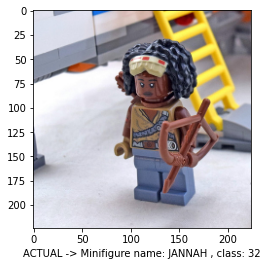

Class: 1 Minifigure: SPIDER-MAN


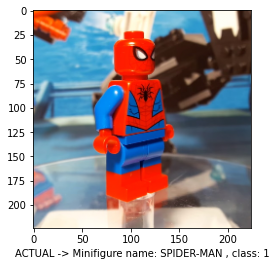

Class: 26 Minifigure: OWEN GRADY


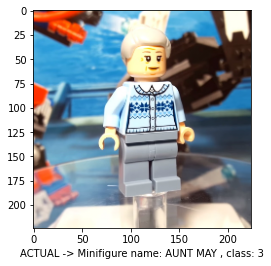

Class: 2 Minifigure: VENOM


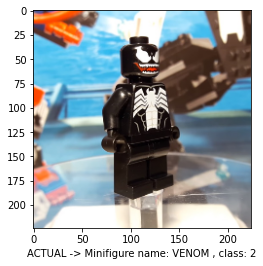

Class: 4 Minifigure: GHOST SPIDER


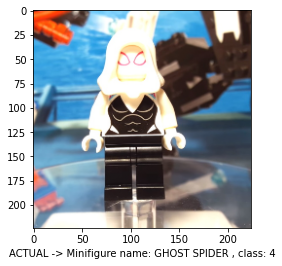

Class: 16 Minifigure: FIREFIGHTER


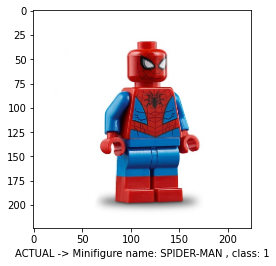

Class: 3 Minifigure: AUNT MAY


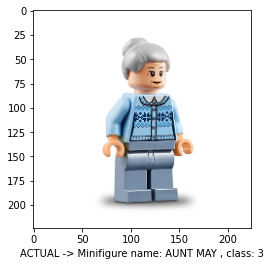

Class: 4 Minifigure: GHOST SPIDER


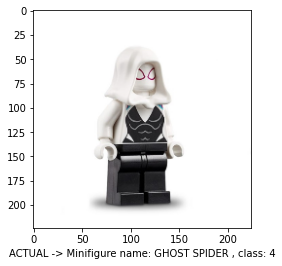

Class: 2 Minifigure: VENOM


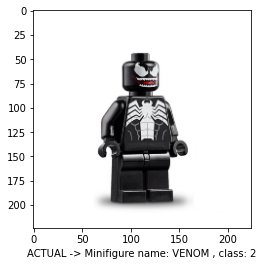

Class: 5 Minifigure: YODA


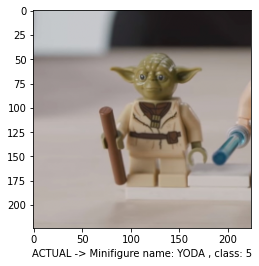

Class: 6 Minifigure: LUKE SKYWALKER


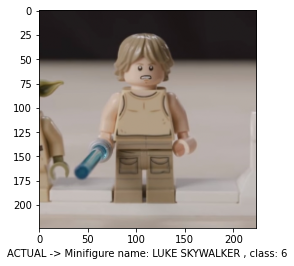

Class: 7 Minifigure: R2-D2


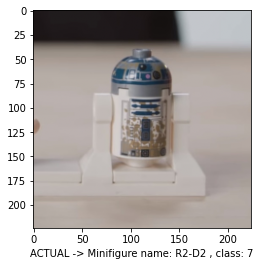

Class: 5 Minifigure: YODA


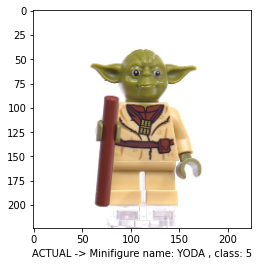

Class: 6 Minifigure: LUKE SKYWALKER


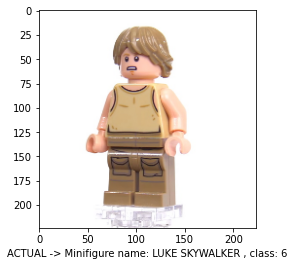

Class: 7 Minifigure: R2-D2


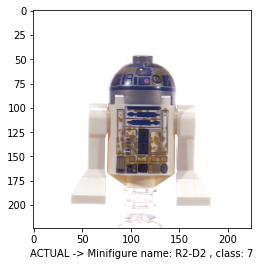

Class: 18 Minifigure: HARRY POTTER


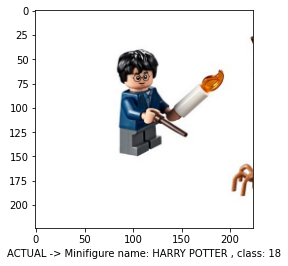

Class: 18 Minifigure: HARRY POTTER


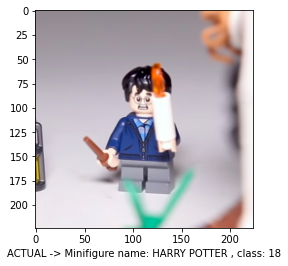

Class: 6 Minifigure: LUKE SKYWALKER


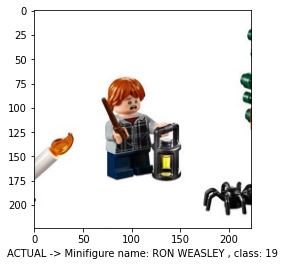

Class: 19 Minifigure: RON WEASLEY


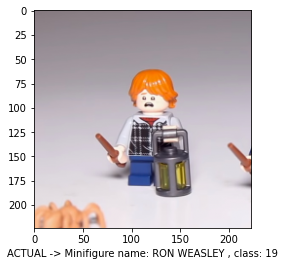

Class: 26 Minifigure: OWEN GRADY


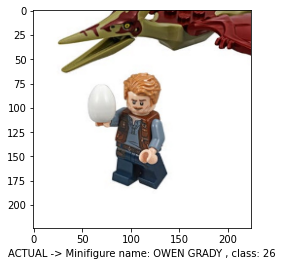

Class: 27 Minifigure: TRACKER TRAQUEUR RASTREADOR


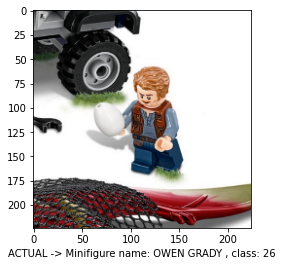

Class: 27 Minifigure: TRACKER TRAQUEUR RASTREADOR


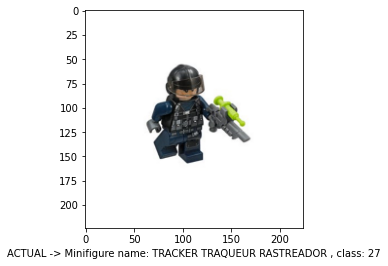

Class: 27 Minifigure: TRACKER TRAQUEUR RASTREADOR


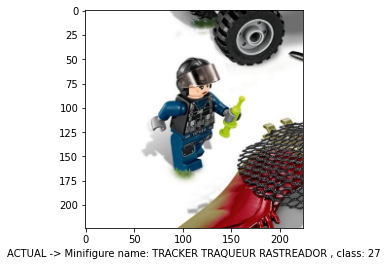

Class: 15 Minifigure: MYSTERIO


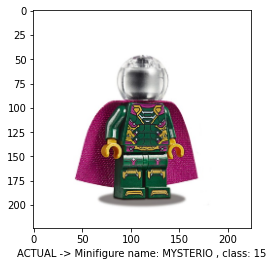

Class: 16 Minifigure: FIREFIGHTER


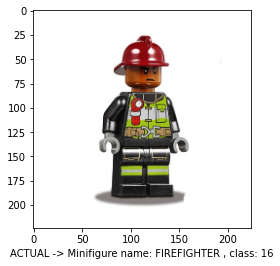

Class: 17 Minifigure: SPIDER-MAN


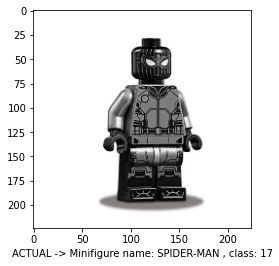

Class: 14 Minifigure: KLATOOINIAN RAIDER 2


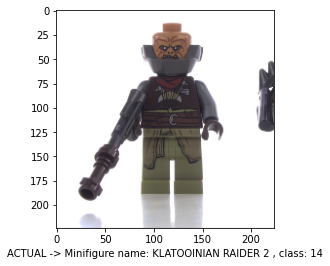

Class: 20 Minifigure: BLACK WIDOW


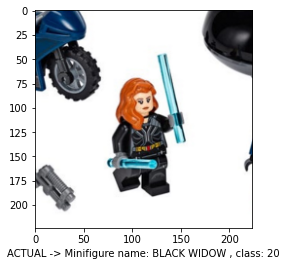

Class: 26 Minifigure: OWEN GRADY


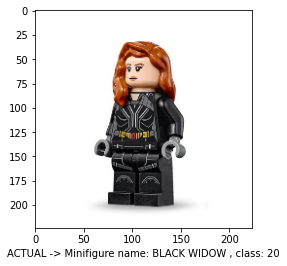

Class: 20 Minifigure: BLACK WIDOW


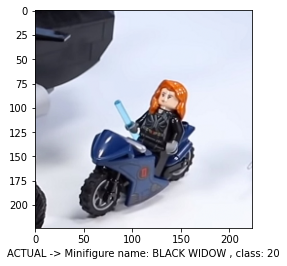

Class: 21 Minifigure: YELENA BELOVA


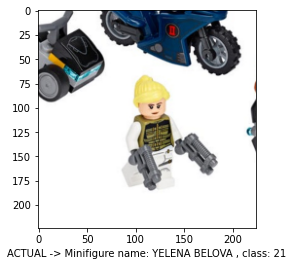

Class: 21 Minifigure: YELENA BELOVA


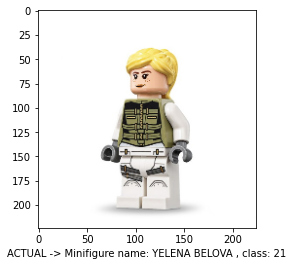

Class: 21 Minifigure: YELENA BELOVA


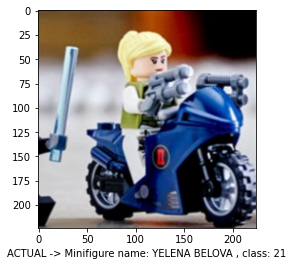

Class: 22 Minifigure: TASKMASTER


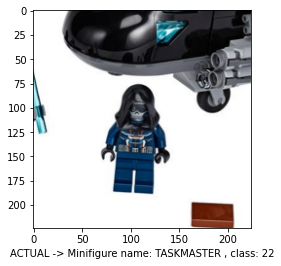

Class: 22 Minifigure: TASKMASTER


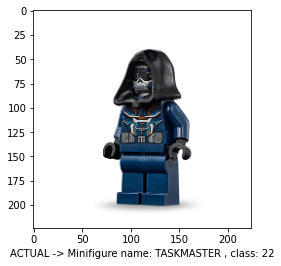

Class: 22 Minifigure: TASKMASTER


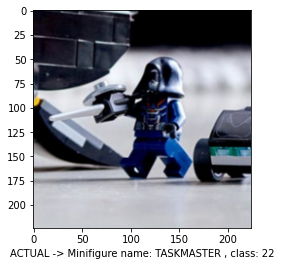

Class: 23 Minifigure: CAPTAIN AMERICA


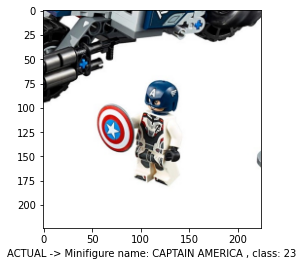

Class: 28 Minifigure: IRON MAN MK 1


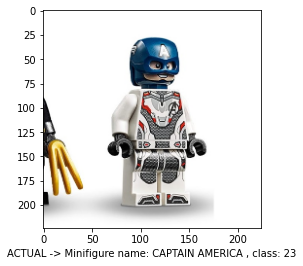

Class: 24 Minifigure: OUTRIDER 1


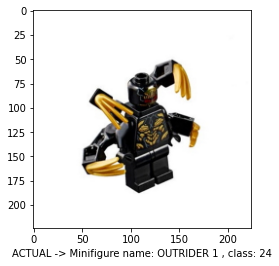

Class: 24 Minifigure: OUTRIDER 1


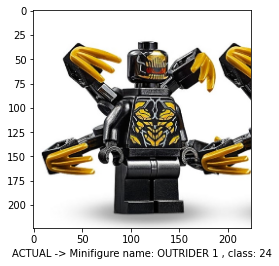

Class: 25 Minifigure: OUTRIDER 2


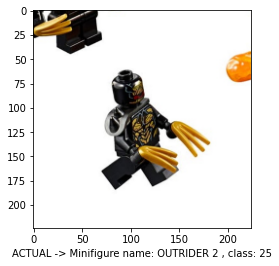

Class: 25 Minifigure: OUTRIDER 2


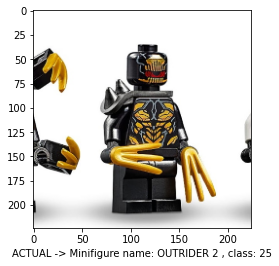

Class: 28 Minifigure: IRON MAN MK 1


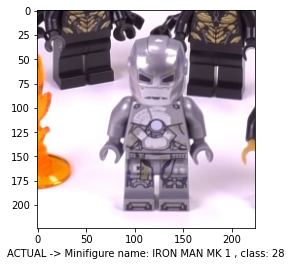

Class: 28 Minifigure: IRON MAN MK 1


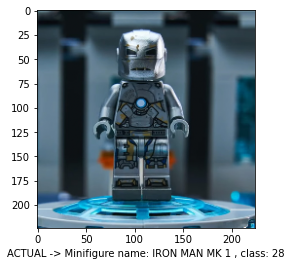

Class: 29 Minifigure: IRON MAN MK 5


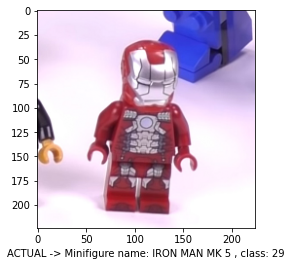

Class: 29 Minifigure: IRON MAN MK 5


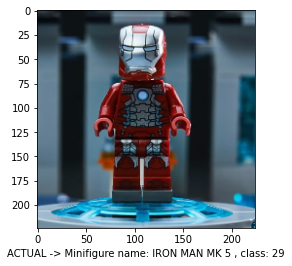

Class: 30 Minifigure: IRON MAN MK 41


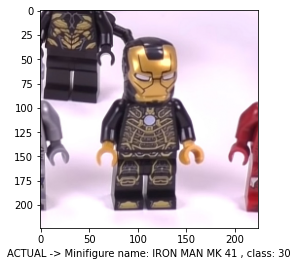

Class: 30 Minifigure: IRON MAN MK 41


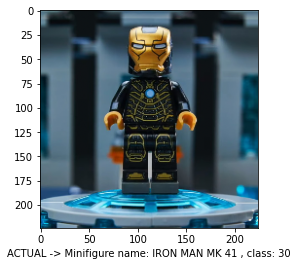

Class: 31 Minifigure: IRON MAN MK 50


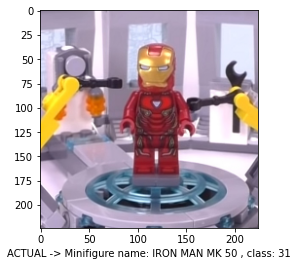

Class: 31 Minifigure: IRON MAN MK 50


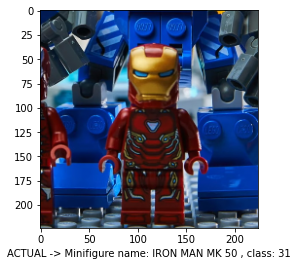

Class: 8 Minifigure: MACE WINDU


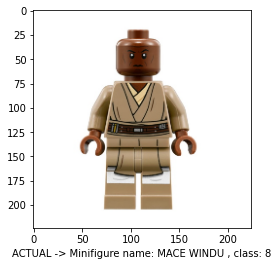

Class: 8 Minifigure: MACE WINDU


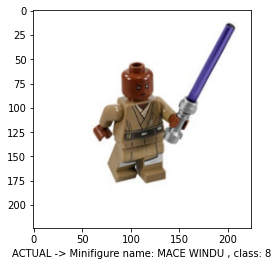

Class: 9 Minifigure: GENERAL GRIEVOUS


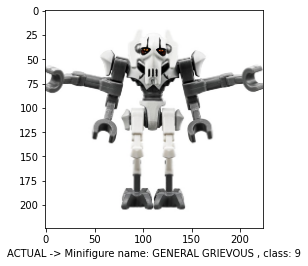

Class: 9 Minifigure: GENERAL GRIEVOUS


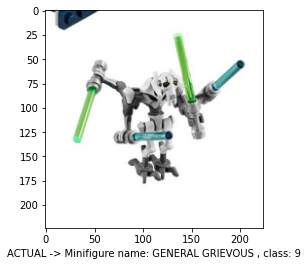

Class: 10 Minifigure: KYLO REN


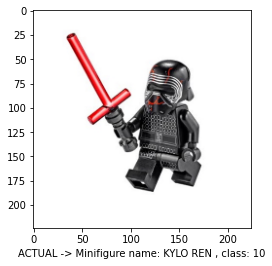

Class: 10 Minifigure: KYLO REN


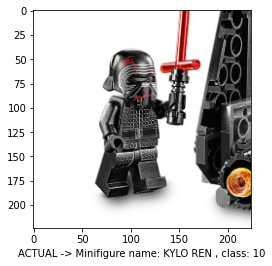

Class: 11 Minifigure: THE MANDALORIAN


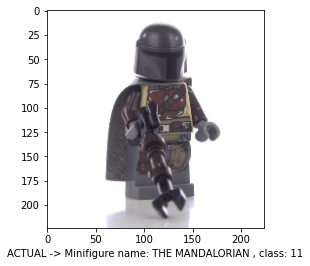

Class: 12 Minifigure: CARA DUNE


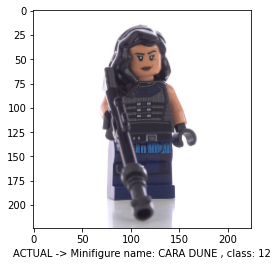

Class: 13 Minifigure: KLATOOINIAN RAIDER 1


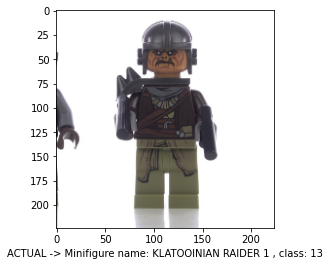

Class: 34 Minifigure: DARTH VADER


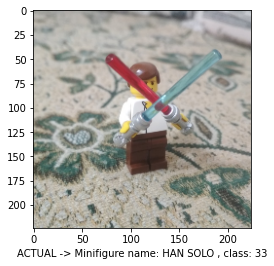

Class: 33 Minifigure: HAN SOLO


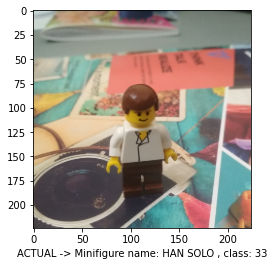

Class: 34 Minifigure: DARTH VADER


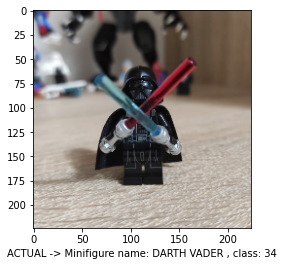

Class: 34 Minifigure: DARTH VADER


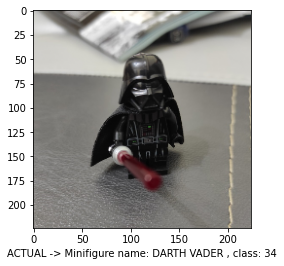

Class: 34 Minifigure: DARTH VADER


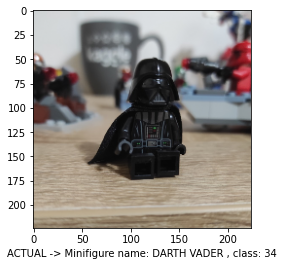

Class: 34 Minifigure: DARTH VADER


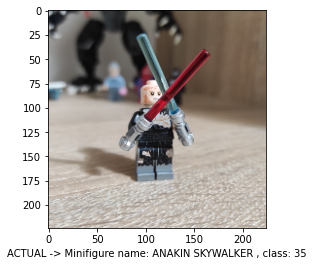

Class: 35 Minifigure: ANAKIN SKYWALKER


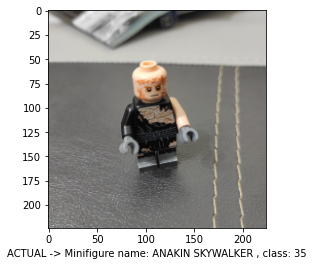

Class: 35 Minifigure: ANAKIN SKYWALKER


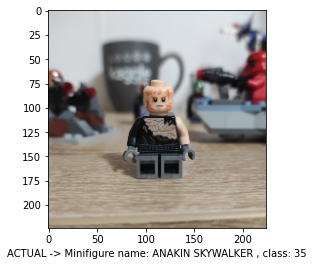

In [ ]:
for i in range(len(test_df)):
    
    image = cv2.imread(X_test['path'].values[i])
    image = cv2.resize(image, dsize=(224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255
    plt.imshow(image)
    plt.xlabel('ACTUAL -> Minifigure name: ' + test_actual_df['minifigure_name'].values[i]+' , class: '+str(test_actual_df['class_id'].values[i]))
    image = np.reshape(image, (1, 224, 224, 3))
    ans = model.predict(image).argmax()
    ans = ans+1
    minifigure = metadata_df["minifigure_name"][metadata_df["class_id"] == ans].iloc[0]
    print("Class:", str(ans)+ " Minifigure:",minifigure)
    plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_val_converted, y_val_converted, verbose=1)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

3/3 [==============================] - 4s 523ms/step - loss: 0.6629 - accuracy: 0.8986
Test loss: 0.6629192233085632
Test accuracy: 0.8985507488250732


<h2> ResNet50 </H2> 
Drugi algoritam koji cemo iskoristiti i onda uporediti koji daje bolje rezultate.

In [ ]:
model3 = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   weights='imagenet',
                   input_shape=(224, 224, 3),
                   pooling='avg')

for layer in pretrained_model.layers:
        layer.trainable=False

model3.add(pretrained_model)
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(512, activation='relu'))
model3.add(tf.keras.layers.Dense(number_of_classes, activation='softmax'))

model3.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 35)                17955     
                                                                 
Total params: 24,662,947
Trainable params: 1,071,139
Non-

In [ ]:
model3.compile(
    optimizer=Adam(0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='max', patience=5,  restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( monitor = "accuracy", factor = 0.5, patience = 3, verbose = 0, min_lr = 0.0001 ) 
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, verbose=1)

In [ ]:
hist=model3.fit(X_train_converted, 
                y_train_converted, 
                validation_data=(X_val_converted, y_val_converted), 
                batch_size = 10, 
                epochs=20, 
                callbacks=[checkpoint, early_stopping, learning_rate_reduction])

Epoch 1/20
28/28 [==============================] - ETA: 0s - loss: 3.5718 - accuracy: 0.0403
Epoch 1: val_accuracy did not improve from 0.89855
28/28 [==============================] - 7s 106ms/step - loss: 3.5718 - accuracy: 0.0403 - val_loss: 3.5840 - val_accuracy: 0.0290 - lr: 1.0000e-04
Epoch 2/20
27/28 [===========================>..] - ETA: 0s - loss: 3.1352 - accuracy: 0.1630
Epoch 2: val_accuracy did not improve from 0.89855
28/28 [==============================] - 1s 44ms/step - loss: 3.1386 - accuracy: 0.1612 - val_loss: 3.5333 - val_accuracy: 0.0290 - lr: 1.0000e-04
Epoch 3/20
27/28 [===========================>..] - ETA: 0s - loss: 2.8925 - accuracy: 0.2519
Epoch 3: val_accuracy did not improve from 0.89855
28/28 [==============================] - 1s 44ms/step - loss: 2.8963 - accuracy: 0.2527 - val_loss: 3.5027 - val_accuracy: 0.0435 - lr: 1.0000e-04
Epoch 4/20
27/28 [===========================>..] - ETA: 0s - loss: 2.7212 - accuracy: 0.3185
Epoch 4: val_accuracy did not

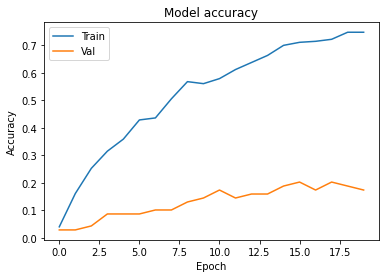

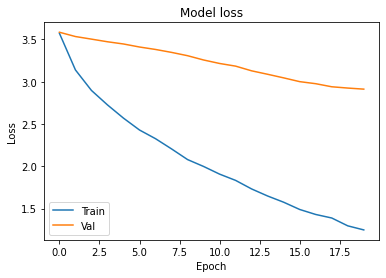

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower left')
plt.show()

In [ ]:

loss, accuracy = model3.evaluate(X_val_converted, y_val_converted, verbose=1)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

3/3 [==============================] - 1s 242ms/step - loss: 2.9118 - accuracy: 0.1739
Test loss: 2.9117541313171387
Test accuracy: 0.17391304671764374


Na osnovu grafikona i rezultata test loss-a i test accurancy-ja, može se zaključiti da prethodni algoritam daje znatno bolje rezultate koji su u opsegu vrednosti za date metrike, dok drugi algoritam ima znatno lošije rezultate, jer vrednosti i te kako odstupaju od očekivanih za pomenute metrike.